# Estadística Descriptiva
Inteligencia Artificial - Facundo A. Lucianna - CEIA - FIUBA

Una parte esencial del día a día de un Data Scientist es realizar análisis exploratorios de datos. Buscando resumir de un dataset sus características principales, a menudo utilizando gráficos estadísticos y otros métodos de visualización de datos. Se puede usar o no un modelo estadístico, pero principalmente EDA es para ver lo que los datos pueden decirnos más allá del modelado formal.

En este notebook trabajaremos con datos del [INDEC de población por provincia de 2022](https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-24-85).

OBS: En las celdas de procesamiento si ves ___ es para que reemplaces.

---

Arranquemos cargando nuestro datos.

1. a. Importa `pandas` como `pd` 

In [1]:
import pandas as pd

1. b. De `scipy` importa `stats`

In [2]:
from scipy import stats

2. Lea el csv `poblacion_provincias.csv` en un DataFrame y llame al DataFrame `poblacion`

In [3]:
poblacion = pd.read_csv("./datasets/poblacion_provincias.csv")

3. Imprima `poblacion` entero. Ademas, explore la información sobre columnas.

In [4]:
poblacion

,region,distrito,población
0,Pampeana,Ciudad Autónoma de Buenos Aires,3081550
1,Pampeana,Provincia de Buenos Aires,17875743
2,Noroeste,Catamarca,422476
3,Noreste,Chaco,1227736
4,Patagonia,Chubut,639294
5,Pampeana,Cordoba,3835738
6,Noreste,Corrientes,1139604
7,Pampeana,Entre Rios,1410908
8,Noreste,Formosa,614706
9,Noroeste,Jujuy,787436


In [5]:
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     24 non-null     object
 1   distrito   24 non-null     object
 2   población  24 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


## Mediciones de posición

Las variables numericas pueden tener miles de valores unicos. Un paso básico para explorar los datos, es obtener un valor tipico para cada característica o variable. Buscamos encontrar una estimación de donde se encuentran la mayoria de los datos.

### Media

La estimación más básica de la ubicación es la media o valor promedio. La media es la suma de todos los valores dividida por el número de valores.

Calculemos el valor medio de la población de las provincias:

1. Calcule la media de la columna `"población"` de `poblacion`, usando el metodo `.mean()`

In [6]:
poblacion["población"].mean()

1926451.25

Una variación de la media es la **media truncada**, la cual se cálcula descartando porciones de los datos en el extremo inferior y superior, típicamente se descarta igual cantidad en ambos extremos. Justamente se hace esto para eliminar la influencia de valores alejados. 

Un ejemplo de uso de esto el puntaje final en competencia de salto. En el cual el puntaje más alto y más bajo son descartado para calcular el puntaje final, con el objetivo de quitar influencias de manipular el puntaje, tal vez para favorecer a su país.

Otra variante es la **media ponderada**, la cual se multiplica a cada valor por un factor individual, se suma estos valores y luego se divide por la suma de los factores.  

Un ejemplo de esto es calcular el puntaje promedio de un set de examenen, pero los cuales los examenes tienen diferencia ponderancia, con temas más importantes que otros.

2. Calcule la media quitando a `Provincia de Buenos Aires` y `Tierra del Fuego` (Las provincias con mas y menos habitantes respectivamente).

In [7]:
poblacion[~(poblacion["distrito"].isin(["Provincia de Buenos Aires", "Tierra del Fuego"]))]["población"].mean()

1280777.4545454546

3. Calcule la media truncada usando `stats.trim_mean()` quitando un `5%` de ambos extremos.

In [8]:
stats.trim_mean(poblacion["población"], proportiontocut=0.05)

1280777.4545454546

Como podemos ver stats.trim_mean() nos quita automaticamente a `Provincia de Buenos Aires` y `Tierra del Fuego` eligiendo correctamente que porcentaje cortar.

### Mediana

La **mediana** es el número del medio en una lista ordenada de datos. Si hay un número par de valores de datos, el valor medio es uno que no está realmente en el conjunto de datos, sino el promedio de los dos valores que dividen los datos ordenados en mitades superior e inferior. En comparación con la media, que usa todas las observaciones, la mediana depende solo de los valores en el centro de los datos ordenados.

Un ejemplo de la utilidad de la mediana es por ejemplo en el cálculo del salario de un puesto, por ejemplo de Data Scientist. Para saber cuando se gana en el sector, es más util saber la mediana, ya que es el salario del medio, y no la media que puede moverse con salarios extremos (en general para valores superiores) en empresa multinacionales.

1. Calcule la mediana de la columna `"población"` de `poblacion`, usando el metodo `.median()`

In [9]:
poblacion["población"].median()

897895.0

En el dataset tenemos 24 distritos. Veamos que provincias se usaron para calcular el valor de la mediana.

2. Ordene a `poblacion` de menor a mayor usando `"población"` y asignelo a `poblacion_ord`

In [10]:
poblacion_ord = poblacion.sort_values(by="población")

3. Usando .iloc, encuentre la fila 11 y 12.

In [11]:
poblacion_ord.iloc[11:13,:]

,region,distrito,población
17,Cuyo,San Juan,797697
21,Noroeste,Santiago del Estero,998093


Ahi obtenemos a las dos provincias

4. Calcule el promedio de estas dos provincias.

In [12]:
poblacion_ord.iloc[11:13,2].mean()

897895.0

## Mediciones de variación

La posición central es una de las dimensiones de sintetizado de un atributo. Una segunda dimensión, variación o dispersion, mide si los datos estan pegados entre si o si están dispersos. La dispersión de datos es quizas de una de las partes más importante de los datos, entenderla y poder distinguir de la variabilidad que es aleatoria a la que es propia del proceso.  

### Desviación absoluta media

Las medidas de variación mas usadas se basan en medir la diferencia entre los valores medidos y la medida de posición central. Estos desvios nos dicen que tanto estan dispersos los datos alrededor de un valor central. 

Una forma de medir la variabilidad es estimar un valor típico para estas desviaciones. Promediar las desviaciones no es una buena forma de hacerlo, ya que las desviaciones negativas compensan las positivas y será cercana a cero, ya que estamos usando una estimación de valor central. Por lo que una forma de evitar esto es calcular el valor absoluto de estas diferencias y de ahi calcular el promedio. Esta forma de medir variabilidad se llama **desviación absoluta media**.

1. Calcule la desviación media de la columna `"población"` de `poblacion`, usando el metodo `.mad()`

In [13]:
abs(poblacion["población"] - poblacion["población"].mean()).mean()

1731736.2291666667

### Desvio estandar

La medida de variación mas conocida es la **varianza** y el **desvio estandar**, los cuales están basados en vez de obtener el valor absoluto de la desviaciones, es calcular el cuadrado de ellos. La varianza es el promedio de estos desvios al cuadrado, y el desvio estandar es la raiz de la varianza. 

La desviación estándar es mucho más fácil de interpretar que la varianza ya que está en la misma escala que los datos originales. 

1. Calcule el desvio estandar de la columna `"población"` de `poblacion`, usando el metodo `.std()`

In [14]:
poblacion["población"].std()

3540453.962869368

2. Calcule la varianza de la columna `"población"` de `poblacion`, usando el metodo `.var()`

In [15]:
poblacion["población"].var()

12534814263197.412

### Desviación absoluta mediana

Las tres metricas de variacion vista hasta ahora sufre en el problema de ser afectados por valores atipico y extremos. Principalmente la **varianza** y el **desvio estandar** ya que a los desvios se elevan al cuadrado. Una forma más robusta antes valores extremos es usar la **desviación absoluta mediana**. 

Para esta metrica, los desvio se calculan entre los datos y la mediana. Se calcula el valor absoluto de estos desvios y finalmente se calcula la mediana del valor absoluto de los desvios.

1. Calcule la desviación absoluta mediana de la columna `"población"` de `poblacion` usando `stats.median_abs_deviation()`

In [16]:
stats.median_abs_deviation(poblacion["población"])

484793.5

Como se puede ver, las diferentes metricas dan resultados diferentes. El desvio estandar es siempre mayor a la desviacion absoluta media, la cual es siempre mayor a la desviacion absoluta mediana. Lo importante cuando se usan estas metricas es mantener consistentes en nuestros calculos y de otros para poder realizar comparaciones similares.

### Rango

Otra forma de estimar la dispersion de los datos es viendo la dispersión de los datos ordenados. La medida más basica es el rango: la diferencia entre el numero mas grande y el más chico. 

1. Calcule el valor maximo de la columna `"población"` de `poblacion`, usando el metodo `.max()`. Asignelo a `poblacion_maxima`.

In [17]:
poblacion_maxima = poblacion["población"].max()

2. 1. Calcule el valor minimo de la columna `"población"` de `poblacion`, usando el metodo `.min()`. Asignelo a `poblacion_minima`.

In [18]:
poblacion_minima = poblacion["población"].min()

3. Calcule el rango de `"población"` usando `poblacion_maxima` y `poblacion_minima`. Asignelo a `range_pobl`

In [19]:
range_pobl = poblacion_maxima - poblacion_minima

4. Muestre a `range_pobl`

In [20]:
range_pobl

17693760

Aunque siempre es util saber cual es el valor maximo y minimo de un conjunto de datos, pero el rango es muy sensible a los valores atípicos y no es muy útil como medida general de dispersión en los datos.

### Rango basado en percentiles

Para evitar la sensiblidad de los valores alejados, se puede ver el **rango** de los datos luego de descartar los valores de cada extremos. Formalmente, estos tipos de estimaciones se basan en la diferencia entre porcentiles. 

> En un dataset, el percentil Pth es un valor tal que al menos el P por ciento de los valores toman este valor o menos y al menos el (100 – P) por ciento de los valores toman este valor o más. Por ejemplo, para encontrar el percentil 70, se ordena los datos, y luego arrancando del valor más bajo se avanza hasta tomar el 70% de los datos, el ultimo valor que se obtiene es el percentil 70. La mediana es lo mismo que obtener el percentil 50. 

Una variante de percentiles es el cuantil, el cual se indexan los valores usando fracciones (El cuantil 0.7 es lo mismo que el percentil 70).

1. Calcule el cuantil (o percentil) 0.25 y 0.75 (25% y 75%) de la columna `"población"` de `poblacion`, usando el metodo `.quantile()`. Asignelo a `percentile_XX` siendo XX el percentil a calcular.

In [21]:
percentile_25 = poblacion["población"].quantile(.25)
percentile_75 = poblacion["población"].quantile(.75)

2. Imprima todos los percentiles

In [22]:
print(percentile_25)
print(percentile_75)

591240.75
1528063.0


#### Rango intercuartil

Una medida común de la variabilidad es la diferencia entre el **percentil 25** y el **percentil 75**, denominada **rango intercuartil (o IQR)**. 

> Un cuartil es una variante del percentil, en el cual en vez de dividir en 100 valores posibles, se divide en 4, siendo:
> - Q1: percentil 25
> - Q2: percentil 50
> - Q3: percentil 75

El rango intercuartil es la diferencia entre **Q1** y **Q3**. 

1. Calcule el rango intercuartil de la columna `"población"` de `poblacion`, usando el metodo `.quantile()`. Asignelo a IQR.

In [23]:
IQR = poblacion["población"].quantile(.75) - poblacion["población"].quantile(.25)

2. Muestre el resultado

In [24]:
IQR

936822.25

El rango intercuartil es una medida de dispersión robusta a valores alejados. El principal problema en obtener el rango basado en percentiles es que es costoso computacionalmente, por lo que en dataset grandes puede demorar mucho tiempo en calcularse.

## Explorando la distribución de los datos

Cada una de las estimaciones que hemos visto resume los datos en un solo número para describir la posición o la variabilidad de los datos. Aunque nos presenta un buen resumen de los datos, no alcanza para tener una idea general de los mismos, por eso es útil explorar cómo se distribuyen los datos en general.

### Percentiles y diagramas de caja

Cuando vimos *Rango basado en percentiles*, vimos que se pueden usar estos percentiles para medir la dispersión de los datos. Pero los percentiles son valiosos para resumir la distribución de los datos. Es habitual informar los cuartiles (percentiles 25, 50 y 75) y los deciles (percentiles 10, 20,..., 90). Los percentiles son especialmente valiosos para resumir las colas de la distribución. Un caso común que se observa esto es en el Principio de Pareto:

> El principio de Pareto describe el fenómeno estadístico por el que en cualquier población que contribuye a un efecto común, es una proporción pequeña la que contribuye a la mayor parte del efecto. Por ejemplo, al describir la riqueza mundial, se observa que aproximadamente el 20% de la población ostenta el 80% de la riqueza.

Por lo que cualquier distribución de estas características, con una cola larga ([long-tail](https://www.statology.org/long-tail-distribution/)) los percentiles pueden ser útiles. 

1. Calcule el cuantil (o percentil) 0.12, 0.25, 0.5, 0.6, 0.75, 0.94 y 1 (12%, 25%, 50%, 60%, 75%, 94% y 100%) de la columna `"población"` de `poblacion`, usando el metodo `.quantile()`. Asignelo a `percentile_XX` siendo XX el percentil a calcular.

In [25]:
percentile_12 = poblacion["población"].quantile(.12)
percentile_25 = poblacion["población"].quantile(.25)
percentile_50 = poblacion["población"].quantile(.50)
percentile_60 = poblacion["población"].quantile(.60)
percentile_75 = poblacion["población"].quantile(.75)
percentile_94 = poblacion["población"].quantile(.94)
percentile_100 = poblacion["población"].quantile(.100)

2. Imprima todos los percentiles

In [26]:
print(percentile_12)
print(percentile_25)
print(percentile_50)
print(percentile_60)
print(percentile_75)
print(percentile_94)
print(percentile_100)

398951.0
591240.75
897895.0
1210109.5999999999
1528063.0
3742357.1799999992
389797.0


Santa Cruz tiene una población que la ubica cercana del percentil 12. En cambio, Córdoba vemos que presenta una población que se ubica cercano del percentil 94%.

In [27]:
poblacion[poblacion["distrito"] == "Santa Cruz"]

,region,distrito,población
19,Patagonia,Santa Cruz,383827


In [28]:
poblacion[poblacion["distrito"] == "Cordoba"]

,region,distrito,población
5,Pampeana,Cordoba,3835738


Los diagramas de cajas están basadas en los percentiles, y dan una rapida visualización de la distribución de los datos.

1. Grafique el diagrama de caja de la columna `"población"` de `poblacion`, usando el metodo `.plot.box()`.

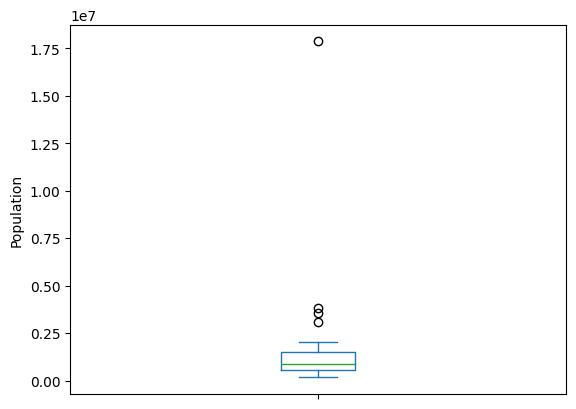

In [29]:
ax = poblacion["población"].plot.box()
ax.set_ylabel('Population');
ax.set_xticklabels('');

A partir de este diagrama de caja, podemos ver de inmediato que la población de las provincias promedio es de aproximadamente 1 millón, que la mitad de las provincias están entre 500.000 y 1.500.000 y hay valores atípicos de población altos. La parte superior e inferior de la caja son los percentiles 75 y 25, respectivamente. La mediana se muestra con la línea horizontal en el recuadro. Las líneas que salen de la caja, denominadas bigotes, se extienden desde la parte superior e inferior del cuadro para indicar el rango de la mayor parte de los datos. Los bigotes es la librería gráfica que usa Pandas por detrás (Matplotlib) los extiende por defecto hasta 1.5 veces el valor del IQR (pero se puede modificar y otros software usan otra interpretación). Cualquier valor por fuera de los bigotes se consideran valores alejados y se los representa como círculos unicos.

### Tablas de frecuencia e histogramas

Una tabla de frecuencia de una variable divide el rango de la variable en segmentos igualmente espaciados y nos dice cuántos valores caen dentro de cada segmento.

1. La función `pd.cut` crea una serie que mapea los valores en los segmentos. Usando la función `pd.cut` divida en 15 segmentos a la columna `"poblacion"` del dataframe `poblacion`. Asignelo a `segmento_provincia`.

In [30]:
segmento_provincia = pd.cut(poblacion["población"], 15)

2. Obtenga la cuenta de cuanta provincias se encuentra en cada segmento usando el metodo `.value_counts()` en `segmento_provincia`.

In [31]:
segmento_provincia.value_counts()

población
(164289.24, 1361567.0]      16
(1361567.0, 2541151.0]       4
(2541151.0, 3720735.0]       2
(3720735.0, 4900319.0]       1
(16696159.0, 17875743.0]     1
(4900319.0, 6079903.0]       0
(6079903.0, 7259487.0]       0
(7259487.0, 8439071.0]       0
(8439071.0, 9618655.0]       0
(9618655.0, 10798239.0]      0
(10798239.0, 11977823.0]     0
(11977823.0, 13157407.0]     0
(13157407.0, 14336991.0]     0
(14336991.0, 15516575.0]     0
(15516575.0, 16696159.0]     0
Name: count, dtype: int64

Obsérvese que a pesar que haber una gran cantidad de segmentos, la mayoría de las provincias se encuentran en el primer segmento (menos de 1.361.567 habitantes). Cada segmento es de un rango de 1.179.584 habitantes. La provincia con mayor habitante es la provincia de Buenos Aires, los segmentos que están por debajo de la provincia de Buenos Aires están vacíos. Es importante incluir los segmentos vacíos; el hecho de que no haya valores en esos segmentos es información útil. También puede ser útil experimentar con diferentes tamaños de segmentos. Si son demasiado grandes, las características importantes de la distribución pueden perderse. Si son demasiado pequeños, el resultado es demasiado granular y se pierde la capacidad de ver el panorama general.

Un histograma es una forma de visualizar una tabla de frecuencia, con los segmentos en el eje x y el conteo de datos en el eje y. 

1. Grafique el histograma de la columna `"población"` de `poblacion`, usando el metodo `.plot.hist()` con quince segmentos (`bins=15`).

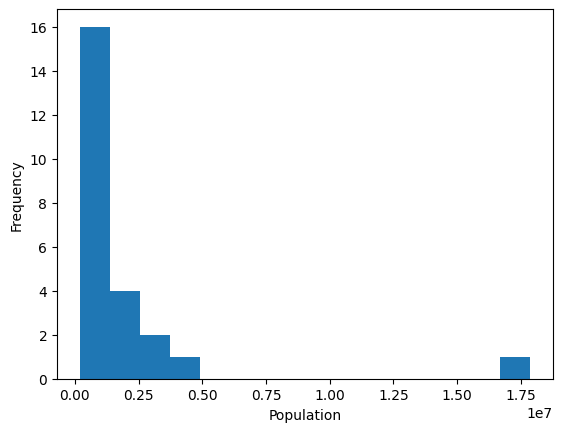

In [32]:
ax = (poblacion["población"]).plot.hist(bins=15)
ax.set_xlabel('Population');

En general, los histogramas se grafican de manera que:
- Los segmentos vacíos se incluyen en el gráfico.
- Los segmentos tienen el mismo ancho.
- El número de segmentos es a elección del usuario.
- Las barras son contiguas, no se muestra ningún espacio vacío entre las barras, a menos que haya un segmentos vacío.

### Gráfica de densidad

Relacionado con el histograma se encuentra el gráfico de densidad, que muestra la distribución de valores de datos como ua línea continua. Este tipo de grafico se puede considerar como un histograma suavizado, haciendo uso de los datos directos a travez de estimación de la densidad del núcleo (para entender en mejor detalle como se construye estos graficos, le recomendamos este [trabajo](https://www.mvstat.net/tduong/research/seminars/seminar-2001-05.pdf).

1. Grafique el histograma de la columna `"población"` de `poblacion`, usando el metodo `.plot.hist()` con quince segmentos (`bins=15`) y que el eje y sea la densidad de probabilidad (`density=True`), es decir el conteo por segmento dividido la cuenta total por el ancho de los segmentos.
2. Grafique en el mismo eje la gráfica de densidad de la columna `"población"` de `poblacion`, usando el metodo `.plot.density()`.

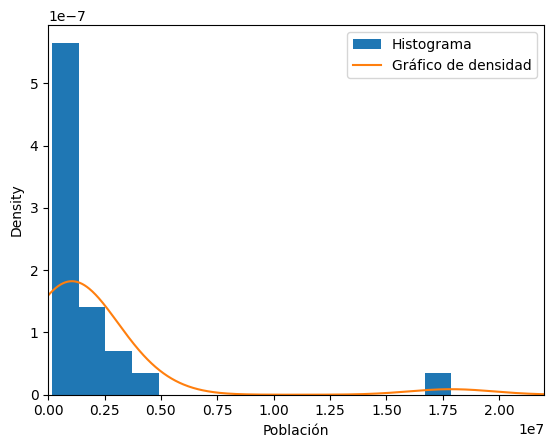

In [33]:
ax = poblacion["población"].plot.hist(bins=15, density=True)
ax = poblacion["población"].plot.density(ax=ax)
ax.set_xlabel('Población')
ax.set_xlim([0, 22000000])
ax.legend(["Histograma", "Gráfico de densidad"]);